In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/euro-sat-dl-proj/2750", 
    batch_size=16, 
    image_size=(64, 64), 
    validation_split=0.3, 
    subset="training", 
    seed=42
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/euro-sat-dl-proj/2750", 
    batch_size=16, 
    image_size=(64,64), 
    validation_split=0.3, 
    subset="validation", 
    seed=42
)






Found 27000 files belonging to 10 classes.
Using 18900 files for training.
Found 27000 files belonging to 10 classes.
Using 8100 files for validation.


In [2]:
# Hyperparameters for ViT
image_size = 64  # We'll use 32x32 images
patch_size = 4   # Split image into 8x8 patches
num_patches = (image_size // patch_size) ** 2
projection_dim = 64  # Dimensionality of the linear projection
num_heads = 4  # Number of attention heads
transformer_units = [projection_dim * 2, projection_dim]  # Dense units in transformer
transformer_layers = 15 # Number of transformer blocks
mlp_head_units = [64, 64]  # Dense layers of the MLP head

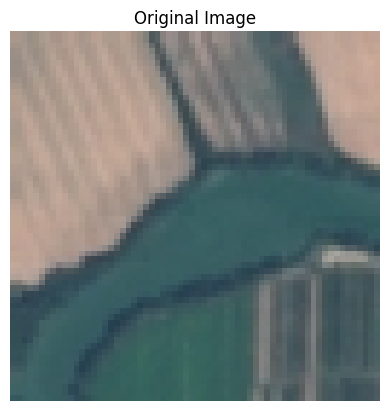

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


I0000 00:00:1728987631.181043      75 service.cc:145] XLA service 0x7f05d0002200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728987631.181106      75 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728987631.181113      75 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1728987642.685893     147 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_415', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1728987646.351569     149 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_395', 256 bytes spill stores, 256 bytes spill loads



   2/1182 ━━━━━━━━━━━━━━━━━━━━ 1:17 66ms/step - accuracy: 0.0938 - loss: 2.9212   

I0000 00:00:1728987653.058024      75 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_28', 56 bytes spill stores, 56 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_26', 56 bytes spill stores, 56 bytes spill loads

I0000 00:00:1728987653.082018      75 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1180/1182 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3855 - loss: 1.6440

I0000 00:00:1728987704.049951     195 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_415', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1728987709.395316     194 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_395', 256 bytes spill stores, 256 bytes spill loads



1182/1182 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3857 - loss: 1.6435

I0000 00:00:1728987716.240436      74 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_27', 56 bytes spill stores, 56 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_23', 56 bytes spill stores, 56 bytes spill loads



1182/1182 ━━━━━━━━━━━━━━━━━━━━ 120s 62ms/step - accuracy: 0.3858 - loss: 1.6432 - val_accuracy: 0.5859 - val_loss: 1.1269
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 50s 43ms/step - accuracy: 0.6364 - loss: 1.0102 - val_accuracy: 0.6656 - val_loss: 0.9515
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - accuracy: 0.6869 - loss: 0.8759 - val_accuracy: 0.7107 - val_loss: 0.8191
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 51s 43ms/step - accuracy: 0.7334 - loss: 0.7662 - val_accuracy: 0.7470 - val_loss: 0.7236
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 51s 43ms/step - accuracy: 0.7509 - loss: 0.7025 - val_accuracy: 0.7827 - val_loss: 0.6239
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - accuracy: 0.7794 - loss: 0.6338 - val_accuracy: 0.7833 - val_loss: 0.6041
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - accuracy: 0.7949 - loss: 0.5840 - val_accuracy: 0.8000 - val_loss: 0.5657
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 51s 43ms/step - accuracy: 0.8079 - loss: 0.5

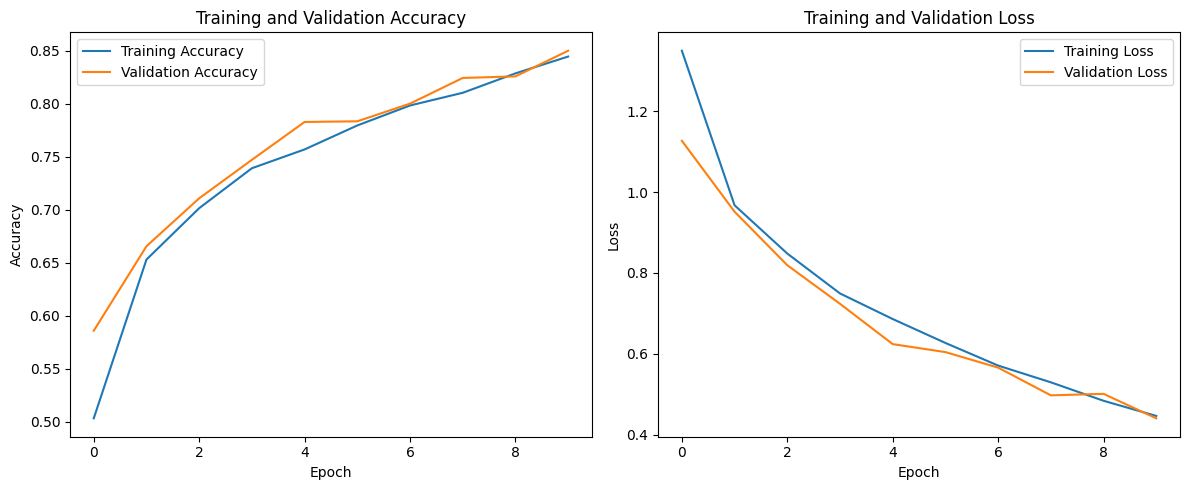

In [3]:
# Visualize patches
def visualize_patches(image, patch_size):
    """Visualizes patches on an image."""
    patches = []
    for i in range(0, image.shape[0], patch_size):
        for j in range(0, image.shape[1], patch_size):
            patch = image[i:i + patch_size, j:j + patch_size, :]
            patches.append(patch)
    
    # Plot patches
    fig, ax = plt.subplots(1, len(patches), figsize=(15, 15))
    for i, patch in enumerate(patches):
        ax[i].imshow(patch)
        ax[i].axis("off")
    plt.show()

# Sample image from the dataset
for images, _ in train_data.take(1):
    sample_image = images[0].numpy().astype("uint8")
    plt.imshow(sample_image)
    plt.axis("off")
    plt.title("Original Image")
    plt.show()

    visualize_patches(sample_image, patch_size)

# Step 1: Patch Embedding Layer
class PatchEmbedding(layers.Layer):
    def __init__(self, patch_size, projection_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.projection_dim = projection_dim
        self.num_patches = (image_size // patch_size) ** 2
        self.patch_dim = patch_size * patch_size * 3  # 3 for RGB channels

    def build(self, input_shape):
        self.projection = layers.Dense(units=self.projection_dim, input_shape=(self.patch_dim,))
        super(PatchEmbedding, self).build(input_shape)

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patches = tf.reshape(patches, [batch_size, self.num_patches, self.patch_dim])
        embeddings = self.projection(patches)
        return embeddings

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.num_patches, self.projection_dim)

class PositionalEmbedding(layers.Layer):
    def __init__(self, num_patches, projection_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.positional_embedding = self.add_weight(
            name="pos_embedding",
            shape=(1, num_patches, projection_dim),  # Shape is based on the number of patches and projection dimension
            initializer="zeros",
            trainable=True,
        )

    def call(self, inputs):
        # Adding positional embedding with broadcasting
        return inputs + self.positional_embedding



# Step 3: Multi-Head Self-Attention
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, num_heads, projection_dim):
        super(MultiHeadSelfAttention, self).__init__()
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)
    
    def call(self, inputs):
        return self.attention(inputs, inputs)

# Step 4: MLP Block
class MLPBlock(layers.Layer):
    def __init__(self, mlp_units):
        super(MLPBlock, self).__init__()
        self.dense1 = layers.Dense(units=mlp_units[0], activation='gelu')
        self.dense2 = layers.Dense(units=mlp_units[1])

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return x
# Step 5: Transformer Block
class TransformerBlock(layers.Layer):
    def __init__(self, projection_dim, num_heads, mlp_units):
        super(TransformerBlock, self).__init__()
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim)
        self.layer_norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layer_norm2 = layers.LayerNormalization(epsilon=1e-6)
        self.mlp_block = MLPBlock(mlp_units)

    def call(self, inputs):
        attention_output = self.attention(inputs, inputs)
        x1 = self.layer_norm1(inputs + attention_output)
        mlp_output = self.mlp_block(x1)
        return self.layer_norm2(x1 + mlp_output)
# Step 6: Build Vision Transformer Model
def build_vit(image_size, patch_size, projection_dim, num_heads, mlp_units, num_classes):
    inputs = layers.Input(shape=(image_size, image_size, 3))

    # Create patch embeddings
    patch_embeddings = PatchEmbedding(patch_size, projection_dim)(inputs)

    # Number of patches calculated from image size and patch size
    num_patches = (image_size // patch_size) ** 2

    # Add positional encoding
    patch_embeddings = PositionalEmbedding(num_patches, projection_dim)(patch_embeddings)

    # Add Transformer Blocks
    x = patch_embeddings
    for _ in range(10):  # Adjust the number of transformer blocks as needed
        x = TransformerBlock(projection_dim, num_heads, mlp_units)(x)

    # Global average pooling across the patch embeddings
    x = layers.GlobalAveragePooling1D()(x)

    # Final classification head
    outputs = layers.Dense(10, activation='softmax')(x)

    return keras.Model(inputs=inputs, outputs=outputs)

# Instantiate and compile the model
vit_model = build_vit(image_size, patch_size, projection_dim, num_heads, mlp_head_units, 6)
vit_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train the model for 5 epochs
history = vit_model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    batch_size=16
)

# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
vit_model.save("vit_classification.keras")

In [5]:
import pickle
with open('vit_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)